In [17]:
class Perceptron(object):
    """
    Perceptron classifiers
    ----------
    Parameters:
    -------------
    eta: float - learning rate between 0 - 1
    n_iter : int - passes over the traning dataset
    random_state : int - random number generator seed for random weight initialization
    
    Attributes
    --------------
    w_ : 1d - array - weights after fitting
    errors_ : list - number of misclassifications (updates) in each epoch
    """
    
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """
        Fitting training data 
        
        Parameters
        --------------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, : n_samples  - # of samples
                                n_features - # of features
                                
        y : array-like, shape = [n_samples]
            Target values
            
        Returns 
        ---------
        self : object
        """
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
        
        self.errors_ = []
        
        for _ in range (self.n_iter):
            errors = 0
            for xi, target in zip (X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update 
                errors += int(update != 0.0)
            self.errors_.append(errors)
            
    def net_input(self, X):
        """
        Calculate net input
        """
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """
        Return class labels after unit step
        """
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [18]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)

In [19]:
#select satosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

In [21]:
#Extract sepal length and petal length (Only the first column and 3rd column have taken not a range)
X = df.iloc[0:100, [0, 2]].values

In [8]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


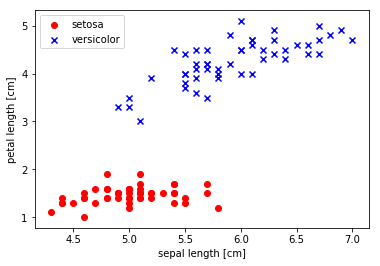

In [22]:
#plot data
#first 50 rows has setosa :
#plot sepal length in x axis and petal length in y axis (scatter plot)
plt.scatter(X[:50, 0], X[:50, 1], color = 'red', marker = 'o', label = 'setosa')

#take next 50 which is versicolor
plt.scatter(X[50:100, 0], X[50:100, 1], color = 'blue', marker = 'x', label = 'versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc = 'upper left')

In [23]:
#apply perceptron class
ppn = Perceptron(eta = 0.1, n_iter = 10)

In [24]:
#fit Perceptron model
ppn.fit(X,y)

Text(0,0.5,'Number of updates')

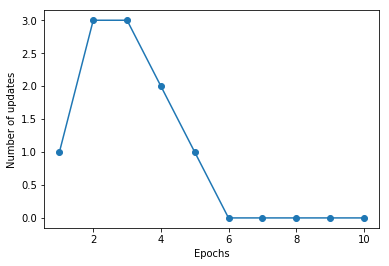

In [27]:
#plot error 
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker = 'o')

plt.xlabel('Epochs')
plt.ylabel('Number of updates')

In [31]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution = 0.02):
    #set up marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

In [33]:
#plot the decision surface
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() +1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() +1
xx1, xx2 = np.meshgrid(
                        np.arange(x1_min, x1_max, resolution),
                        np.arange(x2_min, x2_max, resolution)
                      )
Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)

NameError: name 'resolution' is not defined